In [185]:
import pandas as pd
import regex as re
import statistics
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import requests
import json
import sys
sys.path.append('../bgc-analysis')
from  calc_sensor import pH_sbe, o2_sbe
import numpy as np
from datetime import datetime
from db_api import get_continuous_one_profile,get_continuous_one_float
from get_cal_sn import get_cal
import array
from calc_sensor import pH_sbe
import openpyxl

In [186]:
SN = 1528       #UPDATE FOR EACH FLOAT
meta = get_cal(SN)
pcal = meta["CTD_PRES"].PREDEPLOYMENT_CALIB_COEFFICIENT
tcal = meta["CTD_TEMP"].PREDEPLOYMENT_CALIB_COEFFICIENT
scal = meta["CTD_CNDC"].PREDEPLOYMENT_CALIB_COEFFICIENT



In [187]:

filelocation = 'G:\\Shared drives\WHOI Argo\BGC\Float Tracking\pressure_test_results\\' + 'combined_test_results' + '\\' + str(SN) + '_pressure_test_results' + ".xlsx"
dff = pd.read_excel(filelocation)

temp = dff['TEMP']
pressure = (dff['PRES']).to_list()
sal = dff['PSAL']
time = dff['DATE']
pres = (re.findall(r'\d?\d?\d?\d\.\d*', str(pressure)))
p=np.linspace(1,2000,1)

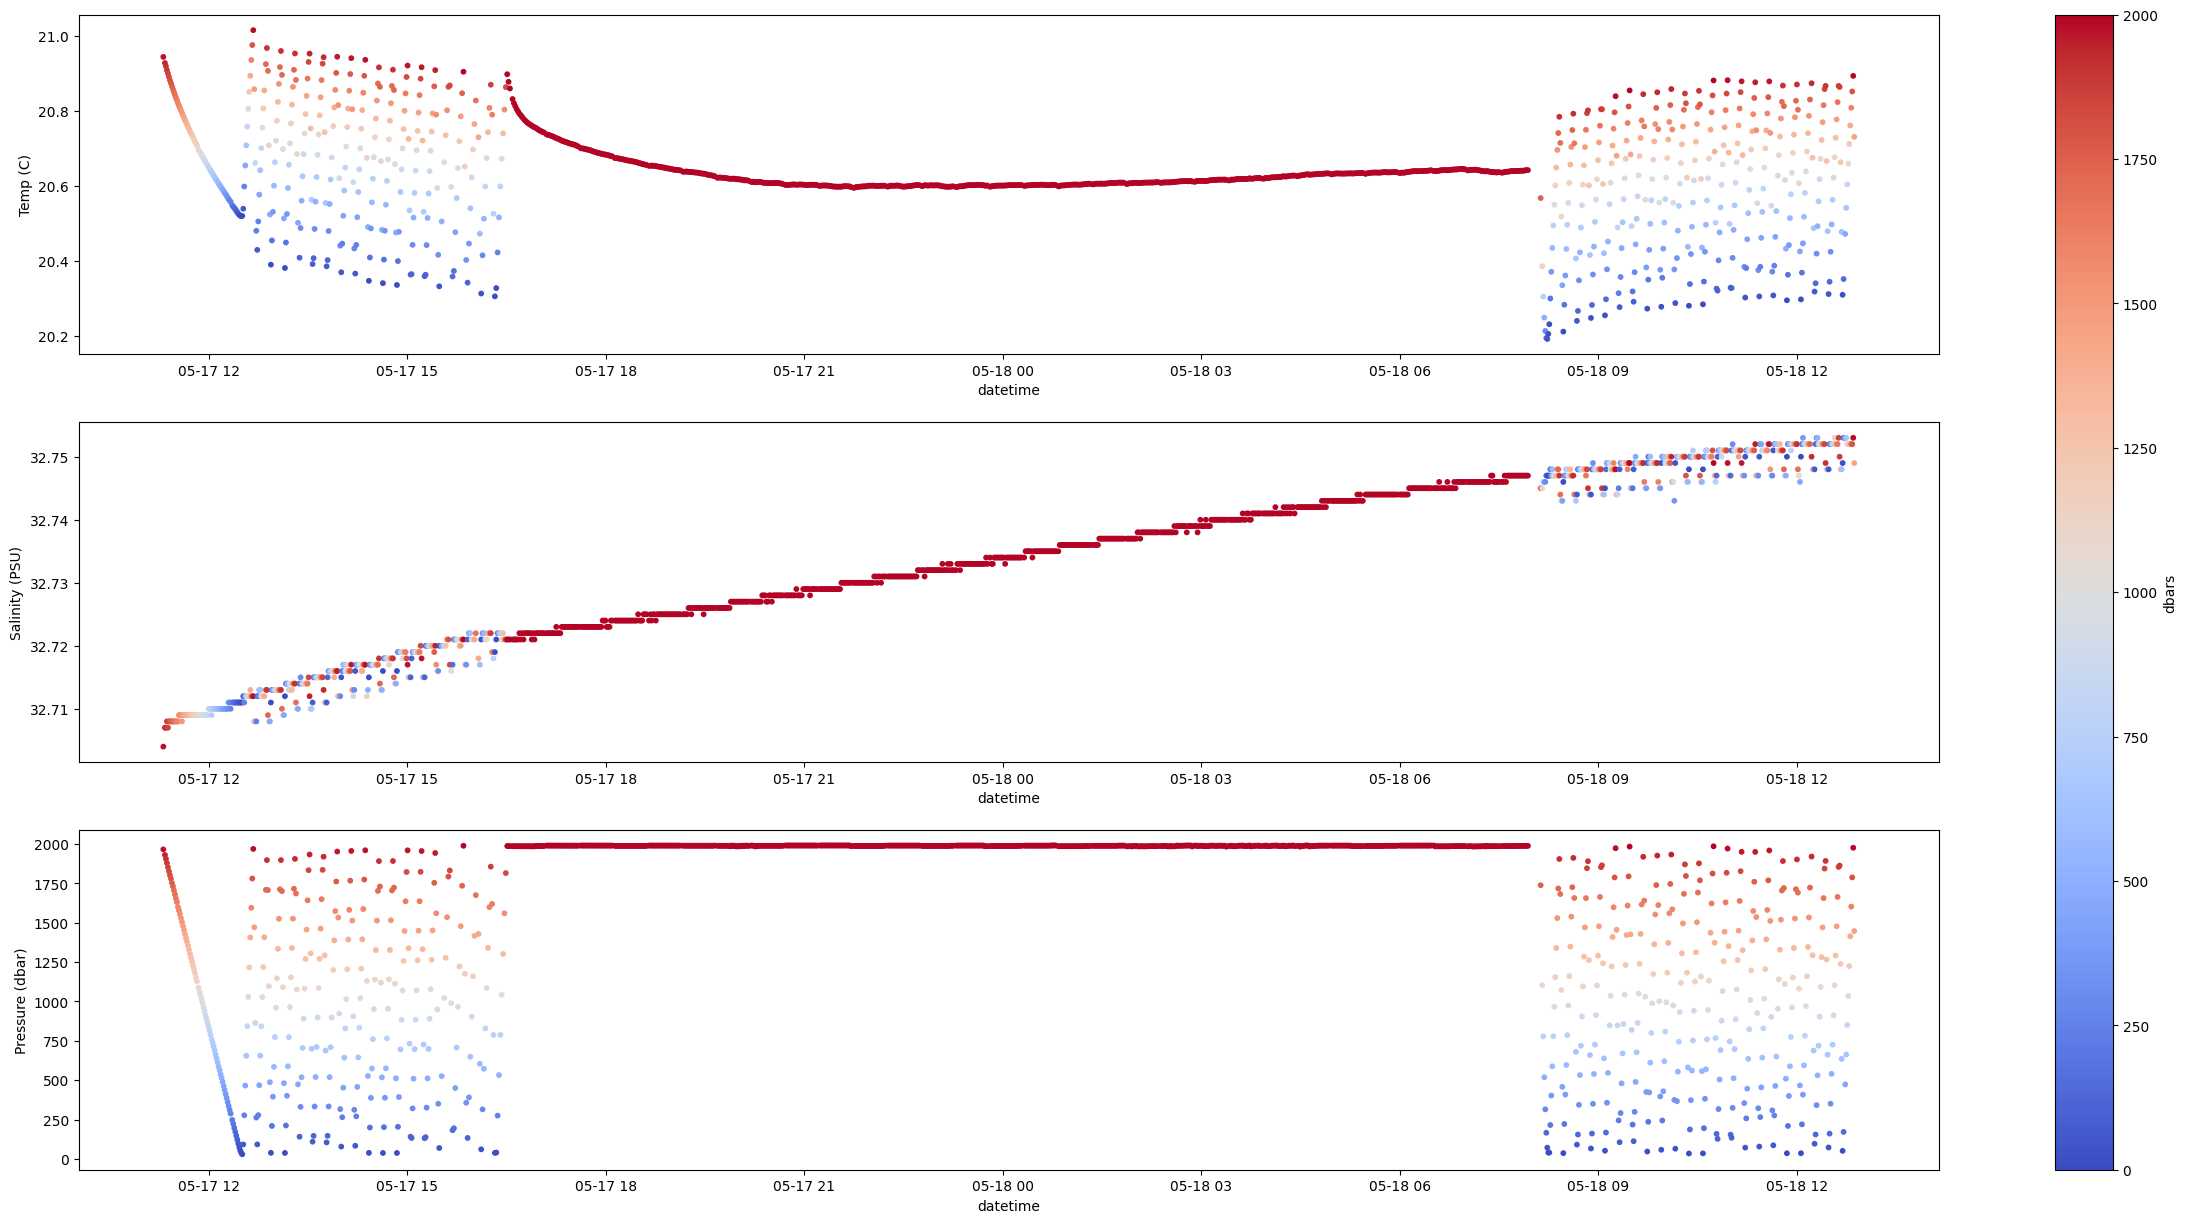

In [188]:
fig, ax = plt.subplots(3,1, figsize = (30, 15))
ax[0].scatter(time,temp, s = 10, c = pressure, cmap = 'coolwarm')
ax[1].scatter(time,sal, s = 10, c = pressure, cmap = 'coolwarm')
ax[2].scatter(time,pressure, s = 10, c = pressure, cmap = 'coolwarm')
ax[0].set_xlabel('datetime')
ax[0].set_ylabel('Temp (C)')
ax[1].set_xlabel('datetime')
ax[1].set_ylabel('Salinity (PSU)')
ax[2].set_xlabel('datetime')
ax[2].set_ylabel('Pressure (dbar)')
norm = mpl.colors.Normalize(vmin=0, vmax = 2000)
cmap = mpl.cm.coolwarm
cbar = fig.colorbar( mpl.cm.ScalarMappable(norm = norm, cmap = cmap), ax = ax[:], orientation = 'vertical', label = 'dbars')

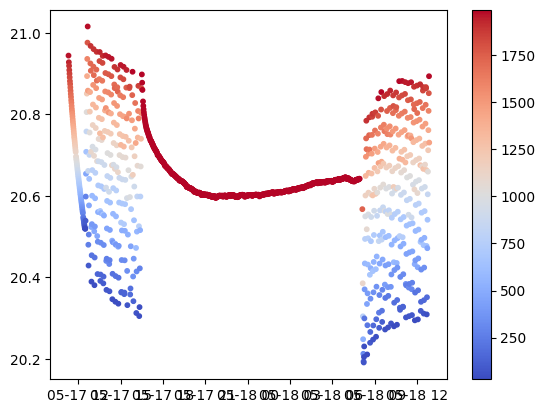

In [189]:

plt.scatter(time,temp, s = 10, c = pressure, cmap = 'coolwarm')
plt.colorbar()


